In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
from config import *

In [3]:
#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [4]:
df = pd.read_csv(sharedFolder + '2020.annual.singlefile.csv')
df

,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,annual_avg_estabs,annual_avg_emplvl,...,oty_total_annual_wages_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_chg,oty_avg_annual_pay_pct_chg
0,1000,0,10,50,0,2020,A,NaN,132126,1909145,...,2507023243,2.6,-275546557,-1.7,-17501048,-9.0,65.0,6.9,3371.0,6.9
1,1000,1,10,51,0,2020,A,NaN,1250,55888,...,239488772,5.2,0,0.0,0,0.0,29.0,1.8,1508.0,1.8
2,1000,1,102,52,0,2020,A,NaN,1250,55888,...,239488772,5.2,0,0.0,0,0.0,29.0,1.8,1508.0,1.8
3,1000,1,1021,53,0,2020,A,NaN,617,11193,...,42231595,5.8,0,0.0,0,0.0,64.0,5.0,3336.0,5.1
4,1000,1,1022,53,0,2020,A,NaN,2,11,...,24145,7.7,0,0.0,0,0.0,68.0,12.7,3539.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795594,19021,5,71395,77,0,2020,A,N,2,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
795595,19021,5,713950,78,0,2020,A,N,2,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
795596,19021,5,71399,77,0,2020,A,N,1,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
795597,19021,5,713990,78,0,2020,A,N,1,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df.groupby(by='area_fips').first()
df['fips'] = df.index

In [6]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")
xwalk

,ctyname,bgrp,cbsa
0,"Washington County, RI",440090513041,39300
1,"Washington County, RI",440090507022,39300
2,"Providence County, RI",440070157002,39300
3,"Providence County, RI",440070176002,39300
4,"Providence County, RI",440070140005,39300
...,...,...,...
172524,"Johnson County, KS",200910501002,28140
172525,"Wyandotte County, KS",202090414003,28140
172526,"Johnson County, KS",200910532011,28140
172527,"Johnson County, KS",200910533021,28140


In [7]:
#Extract block group code
xwalk['fips'] = (xwalk['bgrp'] / 10**7).astype(int)
fipsToCbsa = xwalk.groupby('fips').first()['cbsa']
fipsToCbsa = dict(zip(fipsToCbsa.index, fipsToCbsa.values)) #Dict is faster for lookup

In [8]:
df['CBSA'] = df['fips'].apply(lambda c: fipsToCbsa.get(c, 99999))
df

,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,...,oty_taxable_annual_wages_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_chg,oty_avg_annual_pay_pct_chg,fips,CBSA
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,0,10,50,0,2020,A,N,132126,1909145,99675713076,...,-275546557,-1.7,-17501048,-9.0,65.0,6.9,3371.0,6.9,1000,99999
1001,0,10,70,0,2020,A,N,910,10794,465745049,...,1053994,1.4,58078,6.4,54.0,7.0,2803.0,6.9,1001,33860
1003,0,10,70,0,2020,A,N,6686,73087,3023837650,...,-6250690,-1.0,-487785,-6.7,60.0,8.2,3080.0,8.0,1003,19300
1005,0,10,70,0,2020,A,N,566,7935,322206041,...,567250,0.9,-32972,-4.1,62.0,8.6,3228.0,8.6,1005,21640
1007,0,10,70,0,2020,A,N,370,4653,213928653,...,3169809,9.4,-29602,-5.1,57.0,6.9,2991.0,7.0,1007,13820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,0,10,70,0,2020,A,N,3867,69743,3620367429,...,-19251712,-1.3,-1096439,-4.5,65.0,7.0,3393.0,7.0,19013,47940
19015,0,10,70,0,2020,A,N,741,8636,395896168,...,4897765,3.0,13454,0.8,79.0,9.8,4092.0,9.8,19015,11180
19017,0,10,70,0,2020,A,N,722,9433,419950700,...,-3613311,-2.2,-43083,-1.9,42.0,5.2,2179.0,5.1,19017,47940


In [9]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount_19,workingPop_19,commutePercent_19,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7720.0,69422.0,11.120394,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,90313.0,323548.0,27.913324,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,4136.0,53083.0,7.791572,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6558.0,55731.0,11.767239,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25671.0,418341.0,6.136382,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8894.0,50856.0,17.488595,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,10260.0,0.000000,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10934.0,0.000000,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,9978.0,34969.0,28.533844,10044.0,33194.0,30.258480,True


In [10]:
merge = pd.merge(gdf, df, on='CBSA', how='inner')
merge

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_chg,oty_avg_annual_pay_pct_chg,fips
0,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",...,1.7,3674114,1.0,-559799,-11.4,54.0,6.5,2832.0,6.6,13095
1,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",...,6.9,-89751,-0.1,-254378,-27.7,48.0,6.8,2462.0,6.7,13177
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",...,-0.5,-601094,-3.7,-27435,-17.3,71.0,10.8,3734.0,10.9,13273
3,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",...,-3.6,-467825,-1.9,-2045,-0.9,22.0,3.2,1175.0,3.3,13321
4,11180,Metropolitan Statistical Area,125345,126442,126282,"Ames, IA","POLYGON ((-10430416.864 5140534.816, -10430548...",False,False,"POLYGON ((-10643309.676 5186923.091, -10643311...",...,4.9,4897765,3.0,13454,0.8,79.0,9.8,4092.0,9.8,19015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,47700,Micropolitan Statistical Area,80155,80323,80826,"Warsaw, IN","POLYGON ((-9547728.616 5076827.851, -9547115.8...",False,True,"POLYGON ((-9742973.441 5032446.285, -9742993.6...",...,-1.6,-16937727,-4.3,1496735,28.8,44.0,4.5,2296.0,4.5,18085
510,47780,Micropolitan Statistical Area,33366,33381,33418,"Washington, IN","POLYGON ((-9700587.628 4699915.920, -9700570.4...",False,True,"POLYGON ((-9573406.244 4527500.458, -9576200.3...",...,7.8,888305,0.8,-108196,-8.5,70.0,9.7,3664.0,9.7,18027
511,48100,Micropolitan Statistical Area,25331,25307,25645,"Wauchula, FL","POLYGON ((-9134260.941 3198038.683, -9134261.6...",False,True,"POLYGON ((-9295246.776 3189983.893, -9295243.8...",...,5.1,1137836,2.6,-105008,-25.9,35.0,5.1,1813.0,5.0,12049
512,48180,Micropolitan Statistical Area,55971,55522,55782,"Waycross, GA","POLYGON ((-9174645.593 3687038.888, -9174320.8...",False,True,"POLYGON ((-9366655.758 3676530.330, -9365824.5...",...,4.9,1773444,4.7,443,0.1,37.0,5.5,1922.0,5.5,13229


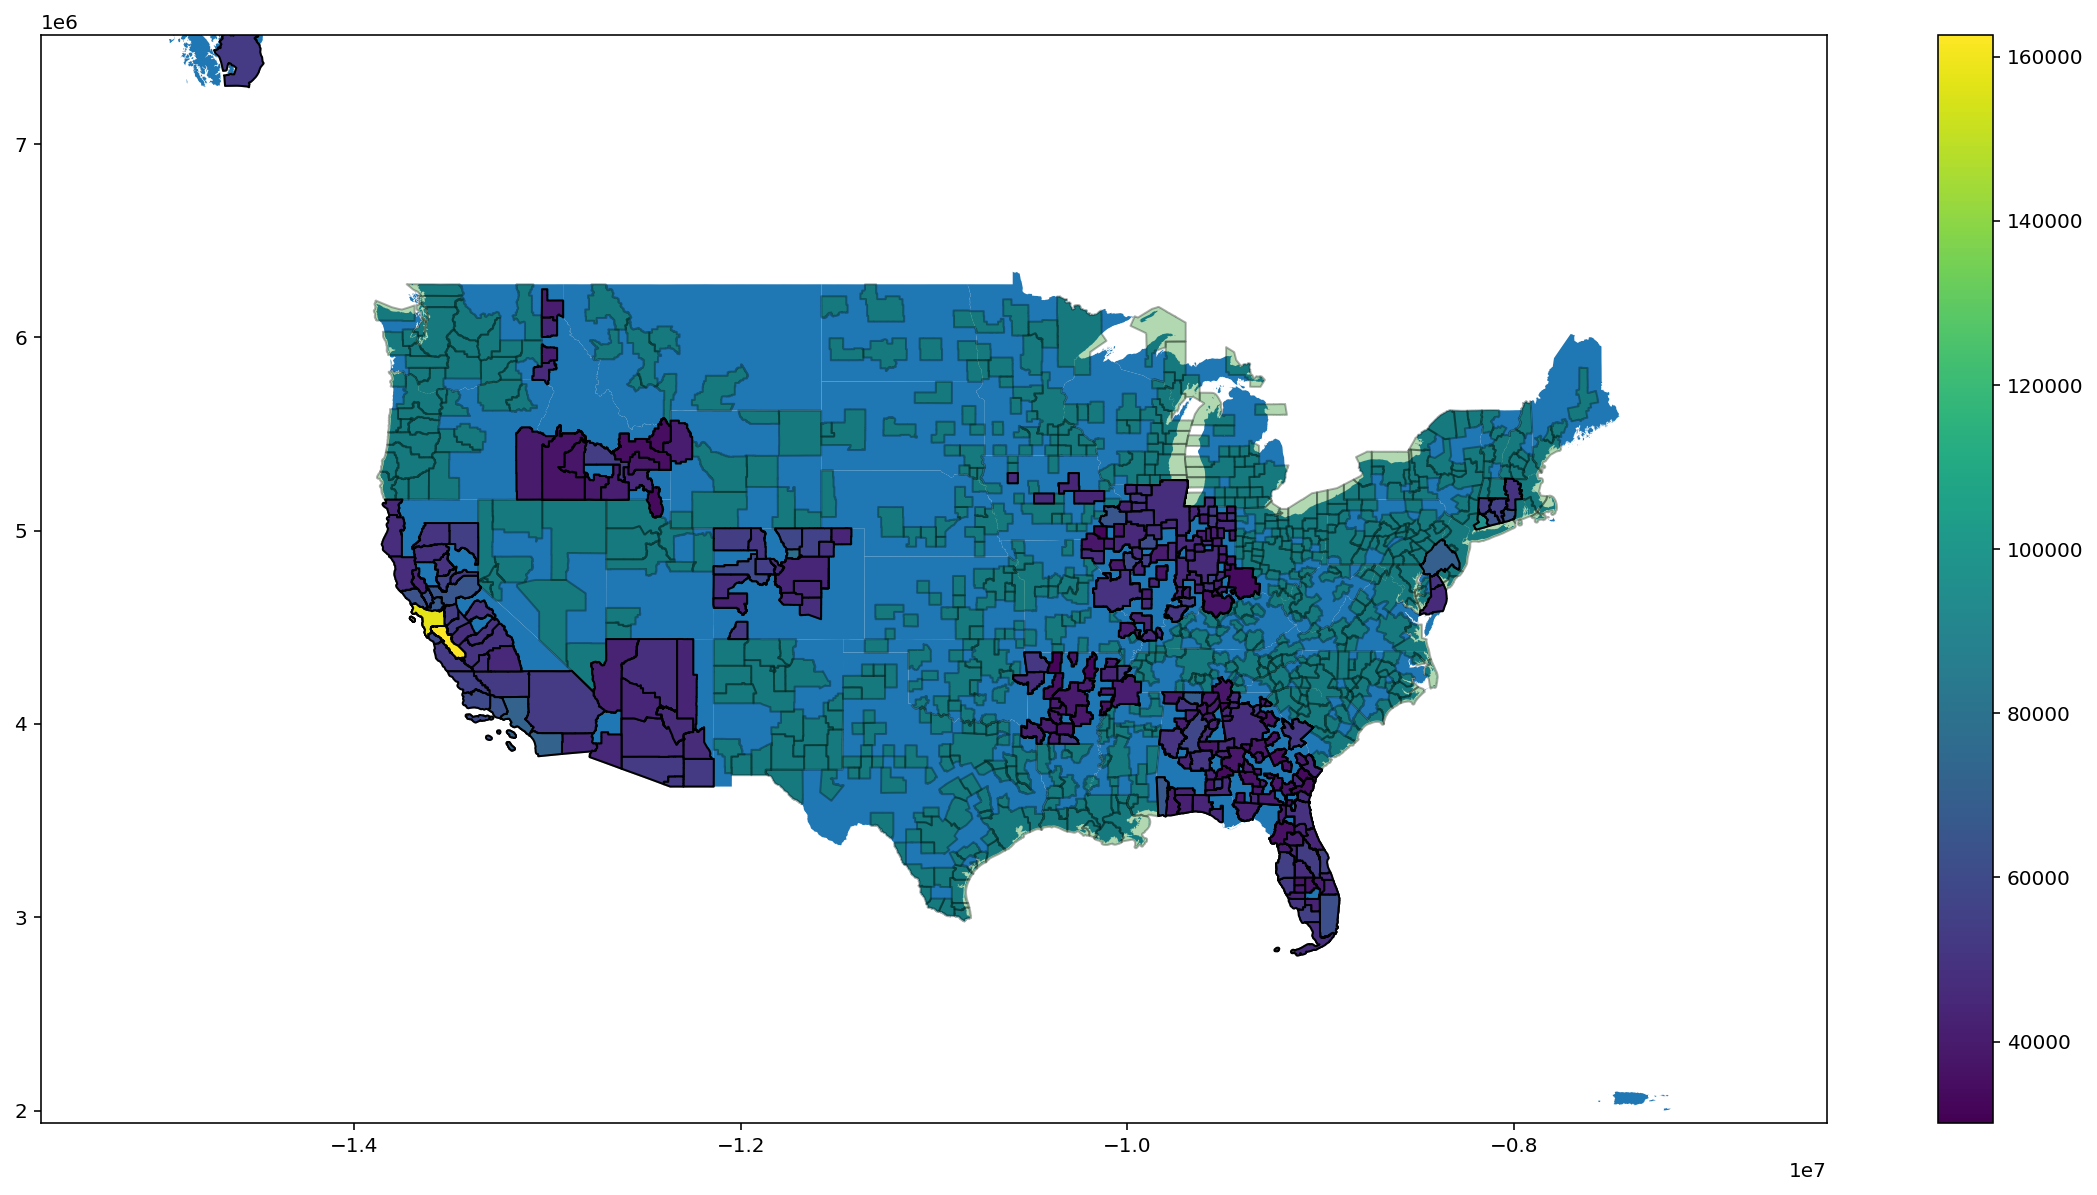

In [11]:
ax = plotUS()
gdf.plot(ax=ax, color='green', edgecolor="black", linewidth=1, alpha=0.3);
merge.plot(ax=ax, column='avg_annual_pay', edgecolor="black", linewidth=1, legend=True);